Module 7 Case study 1

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
#1 We will use acoustic features to distinguish a male voice from a female. 
# Load the dataset from “voice.csv”,identify the target variable and do a one-hot encoding for the same. 
# Split the dataset into train-test with 20% of the data kept aside for testing.
# [Hint: Refer to LabelEncoder documentation in scikit-learn]

df = pd.read_csv('additional_resources_7_xsa_so3fyvt/voice.csv')
print(df.columns)
df

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0      274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1      634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2     1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3        4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4        4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   
...           ...       ...       ...  ...       ...       ...       ...   
3163     6.630383  0.962934  0.763182  ...  0.131884  0.182790  0.083770   
3164     2.503954  0.960716  0.709570  ...  0.116221  0.188980  0.034409   
3165     6.604509  0.946854  0.654196  ...  0.142056  0.209918  0.039506   
3166     5.388298  0.950436  0.675470  ...  0.143659  0.172375  0.034483   
3167     5.769115  0.938829  0.601529  ...  0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
0     0.275862  0.007812  0.007812  0.007812  0.000000  0.000000    male  
1     0.250000  0.009014  0.007812  0.054688  0.046875  0.052632    male  
2     0.271186  0.007990  0.007812  0.015625  0.007812  0.046512    male  
3     0.250000  0.201497  0.007812  0.562500  0.554688  0.247119    male  
4     0.266667  0.712812  0.007812  5.484375  5.476562  0.208274    male  
...        ...       ...       ...       ...       ...       ...     ...  
3163  0.262295  0.832899  0.007812  4.210938  4.203125  0.161929  female  
3164  0.275862  0.909856  0.039062  3.679688  3.640625  0.277897  female  
3165  0.275862  0.494271  0.007812  2.937500  2.929688  0.194759  female  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002  female  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000  female  

[3168 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
print('Lable is the target variable')

Lable is the target variable


In [ ]:
# label encoding over one-hot encoding as logistic regression requires single target column
# one hot encoding multiple target columns

encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [15]:
df['label'].value_counts()

label
1    1584
0    1584
Name: count, dtype: int64

In [16]:
# split dataset

X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [96]:
#2 Fit a logistic regression model and measure the accuracy of the test set.
# [Hint:Refer to Linear Models section in scikit-learn]

# Train the model
model = LogisticRegression(max_iter=700)
model.fit(X_train, y_train)

# Predict the output
ypred = model.predict(X_test)

# Accuracy score
Score1 = accuracy_score(y_test,ypred)
print('Accuracy score', Score1)

# Cross validation score
cv1 = cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
print('Cross Validation score without DR', cv1)

Accuracy score 0.9053627760252366
Cross Validation score without DR 0.8807137410857118


In [59]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

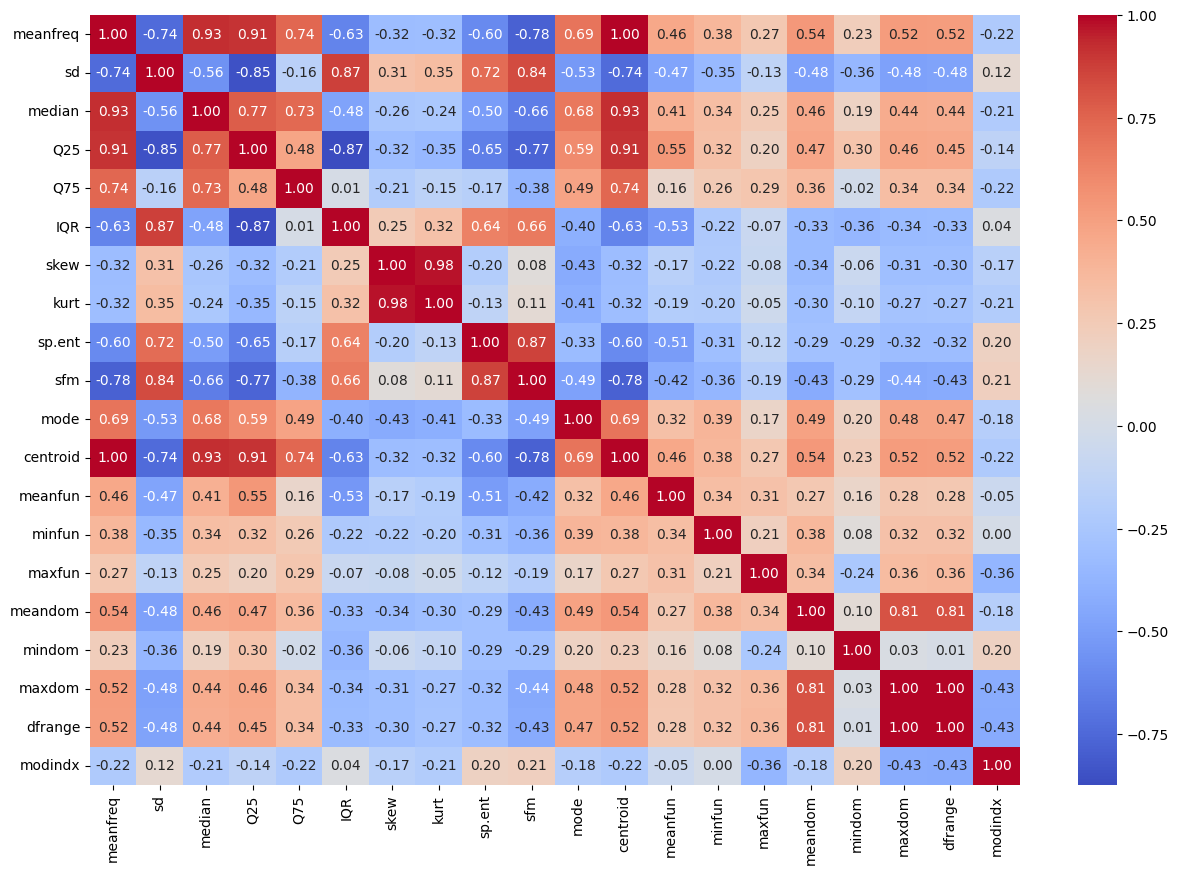

In [ ]:
#3 Compute the correlation matrix that describes the dependence between all predictors and 
# identifies the highly correlated predictors.  
# Plot the correlation matrix using a seaborn heatmap.
# [Hint: Explore dataframe methods to identify appropriate methods]

# Correlation btn all predictors              # drop highly correlated to reduce dimension
predictors = df[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']]

plt.figure(figsize=(15,10))
sns.heatmap(predictors.corr(), cmap='coolwarm', cbar=True, annot=True, fmt='.2f')   #heatmap - grid matrix input
plt.show()

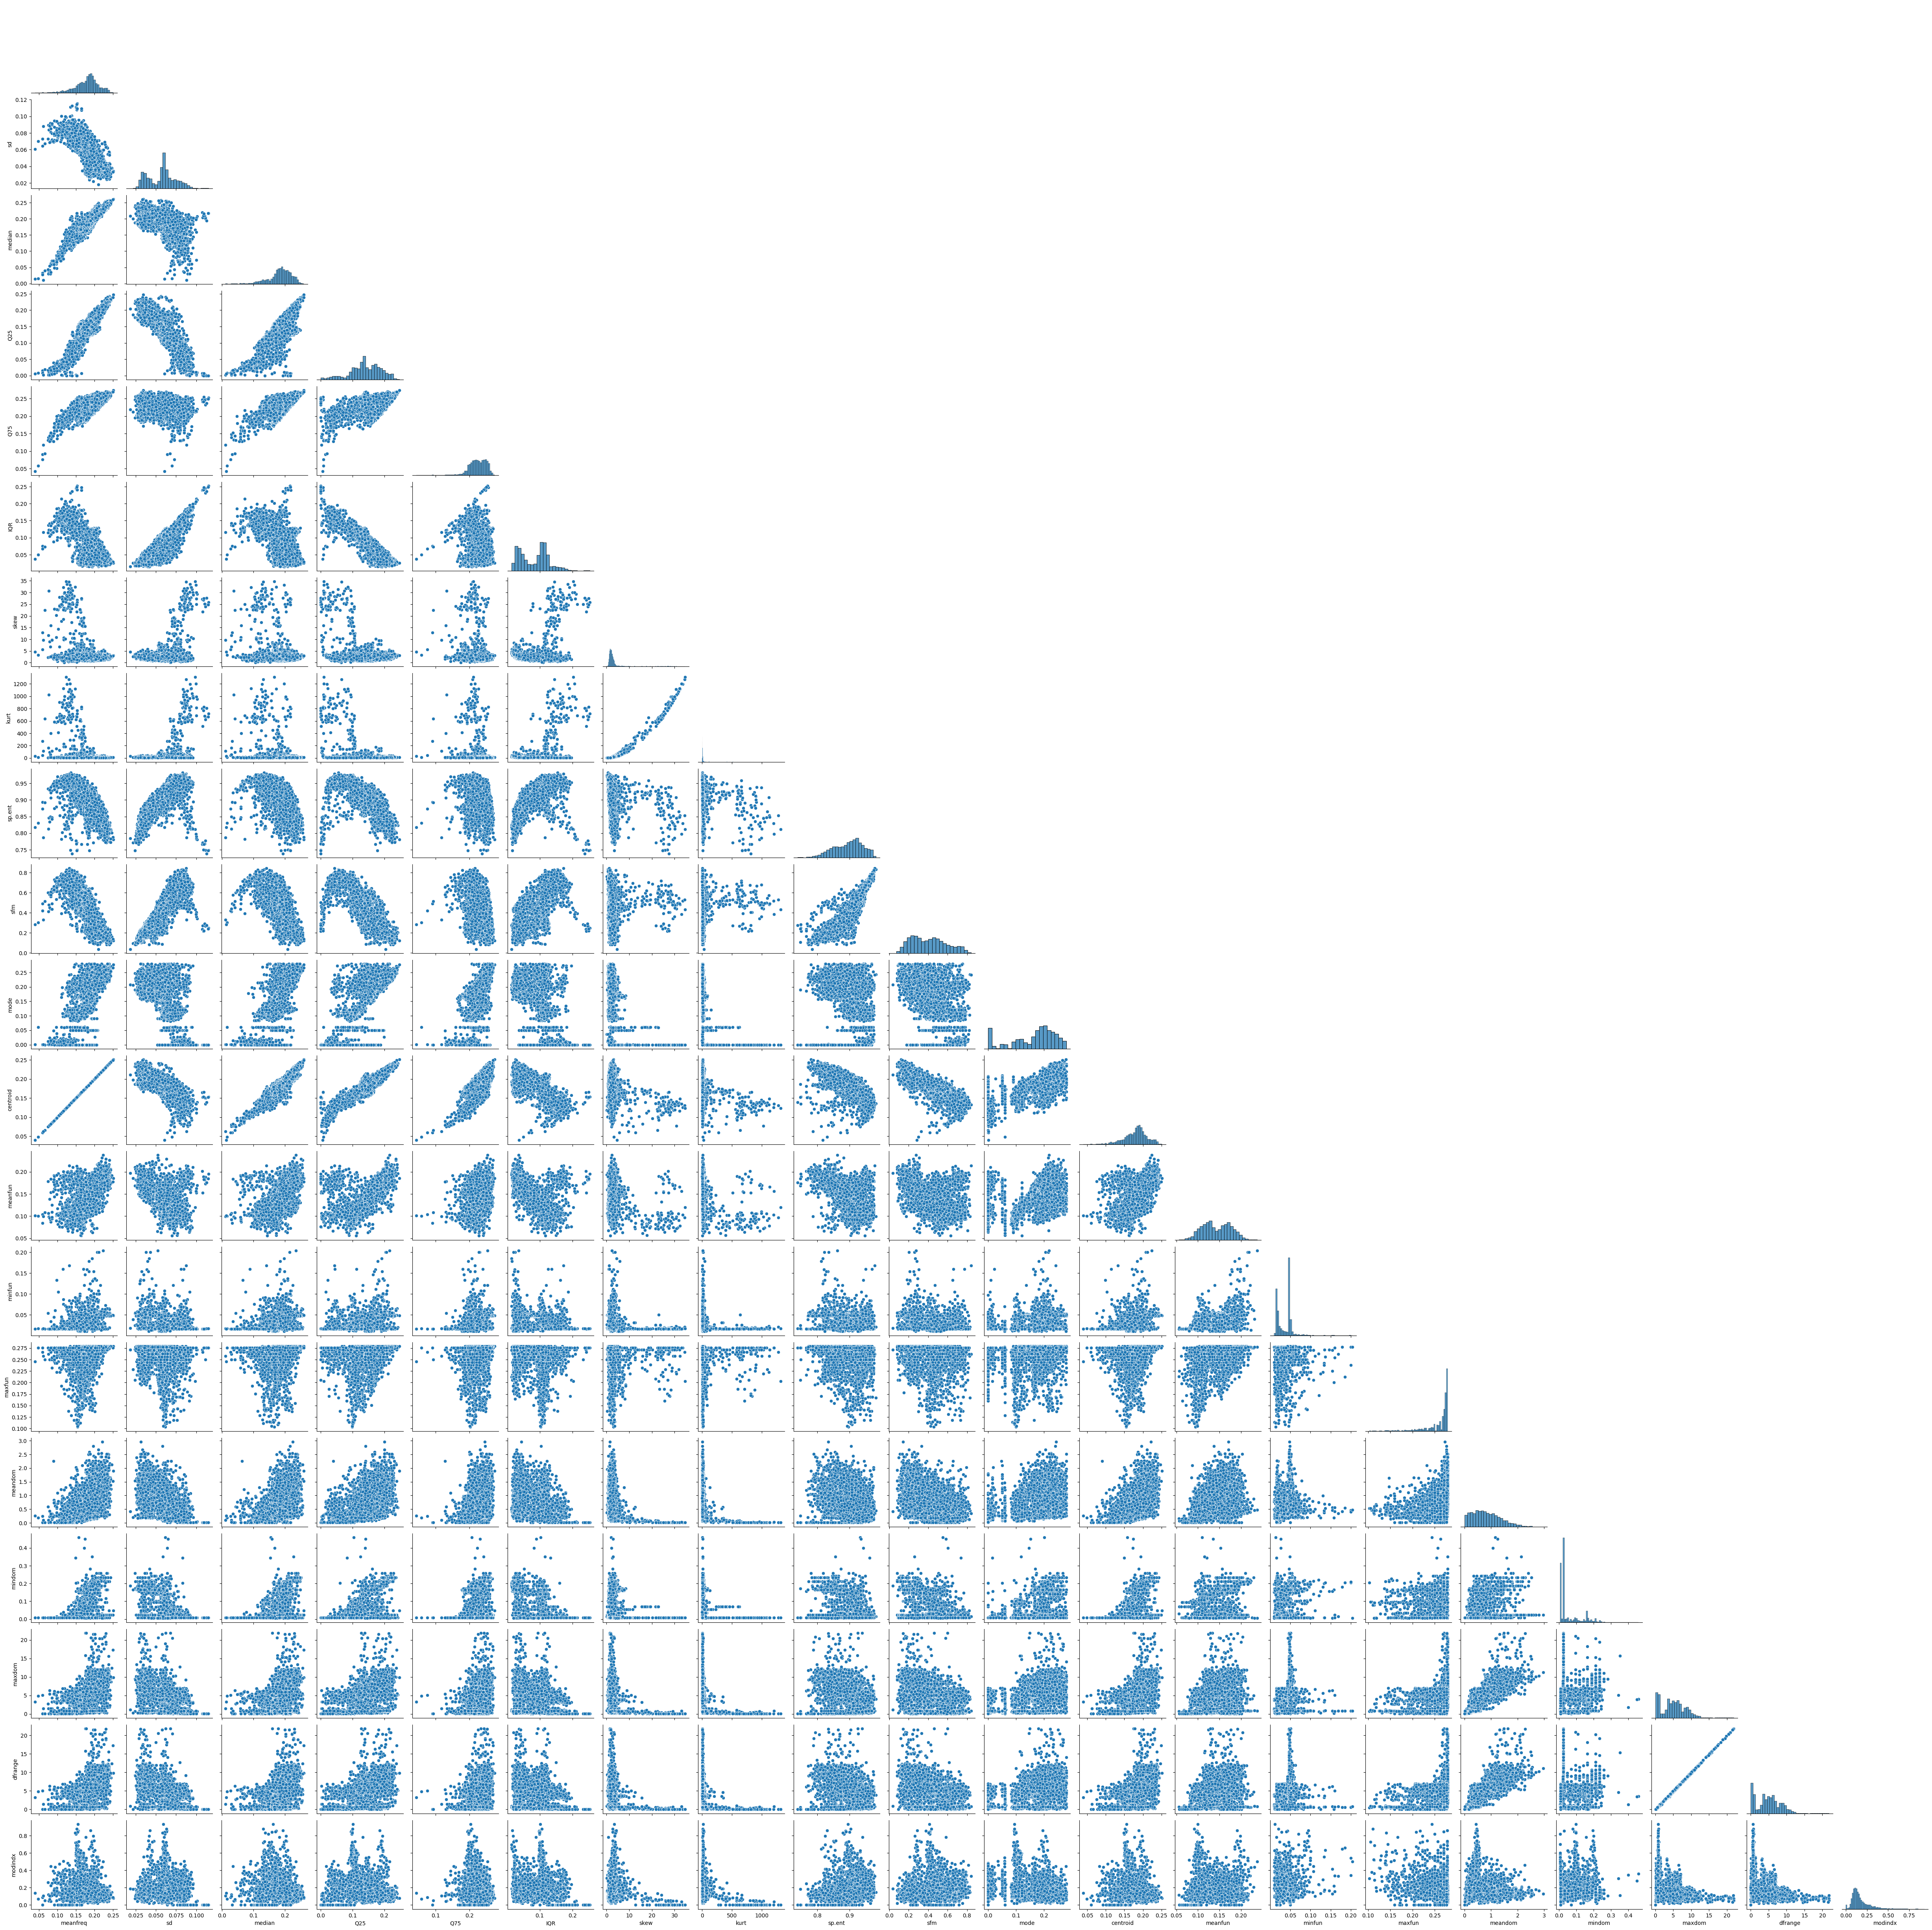

In [34]:
sns.pairplot(predictors, corner=True)
plt.show()

In [ ]:
df.corr()

meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
skew     -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497   
kurt     -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
centroid  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.534462   
minfun    0.383937 -0.345609  0.337602  0.320994  0.258002 -0.222680   
maxfun    0.274004 -0.129662  0.251328  0.199841  0.285584 -0.069588   
meandom   0.536666 -0.482726  0.455943  0.467403  0.359181 -0.333362   
mindom    0.229261 -0.357667  0.191169  0.302255 -0.023750 -0.357037   
maxdom    0.519528 -0.482278  0.438919  0.459683  0.335114 -0.337877   
dfrange   0.515570 -0.475999  0.435621  0.454394  0.335648 -0.331563   
modindx  -0.216979  0.122660 -0.213298 -0.141377 -0.216475  0.041252   
label    -0.337415  0.479539 -0.283919 -0.511455  0.066906  0.618916   

              skew      kurt    sp.ent       sfm  ...  centroid   meanfun  \
meanfreq -0.322327 -0.316036 -0.601203 -0.784332  ...  1.000000  0.460844   
sd        0.314597  0.346241  0.716620  0.838086  ... -0.739039 -0.466281   
median   -0.257407 -0.243382 -0.502005 -0.661690  ...  0.925445  0.414909   
Q25      -0.319475 -0.350182 -0.648126 -0.766875  ...  0.911416  0.545035   
Q75      -0.206339 -0.148881 -0.174905 -0.378198  ...  0.740997  0.155091   
IQR       0.249497  0.316185  0.640813  0.663601  ... -0.627605 -0.534462   
skew      1.000000  0.977020 -0.195459  0.079694  ... -0.322327 -0.167668   
kurt      0.977020  1.000000 -0.127644  0.109884  ... -0.316036 -0.194560   
sp.ent   -0.195459 -0.127644  1.000000  0.866411  ... -0.601203 -0.513194   
sfm       0.079694  0.109884  0.866411  1.000000  ... -0.784332 -0.421066   
mode     -0.434859 -0.406722 -0.325298 -0.485913  ...  0.687715  0.324771   
centroid -0.322327 -0.316036 -0.601203 -0.784332  ...  1.000000  0.460844   
meanfun  -0.167668 -0.194560 -0.513194 -0.421066  ...  0.460844  1.000000   
minfun   -0.216954 -0.203201 -0.305826 -0.362100  ...  0.383937  0.339387   
maxfun   -0.080861 -0.045667 -0.120738 -0.192369  ...  0.274004  0.311950   
meandom  -0.336848 -0.303234 -0.293562 -0.428442  ...  0.536666  0.270840   
mindom   -0.061608 -0.103313 -0.294869 -0.289593  ...  0.229261  0.162163   
maxdom   -0.305651 -0.274500 -0.324253 -0.436649  ...  0.519528  0.277982   
dfrange  -0.304640 -0.272729 -0.319054 -0.431580  ...  0.515570  0.275154   
modindx  -0.169325 -0.205539  0.198074  0.211477  ... -0.216979 -0.054858   
label     0.036627  0.087195  0.490552  0.357499  ... -0.337415 -0.833921   

            minfun    maxfun   meandom    mindom    maxdom   dfrange  \
meanfreq  0.383937  0.274004  0.536666  0.229261  0.519528  0.515570   
sd       -0.345609 -0.129662 -0.482726 -0.357667 -0.482278 -0.475999   
median    0.337602  0.251328  0.455943  0.191169  0.438919  0.435621   
Q25       0.320994  0.199841  0.467403  0.302255  0.459683  0.454394   
Q75       0.258002  0.285584  0.359181 -0.023750  0.335114  0.335648   
IQR      -0.222680 -0.069588 -0.333362 -0.357037 -0.337877 -0.331563   
skew     -0.216954 -0.080861 -0.336848 -0.061608 -0.305651 -0.304640   
kurt     -0.203201 -0.045667 -0.303234 -0.103313 -0.274500 -0.272729   
sp.ent   -0.305826 -0.120738 -0.293562 -0.294869 -0.324253 -0.319054   
sfm      -

In [ ]:
#4 Based on correlation remove those predictors that are correlated and 
# fit a logistic regression model again and compare the accuracy with that of the previous model.
# [Hint:Identify correlated variable pairs and remove one among them]

# pairs with 1.00 and 0.98 correlation

print('''Highly correlated pairs are:  
Meanfreq - Centroid
Maxdom - dfrange
kurt - skew
''')      

Highly correlated pairs are:  
Meanfreq - Centroid
Maxdom - dfrange
kurt - skew



In [ ]:
df2 = df.drop(['centroid','dfrange','skew'], axis=1)
df2

meanfreq        sd    median       Q25       Q75       IQR         kurt  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122   274.402906   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252   634.613855   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  1024.927705   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374     4.177296   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325     4.333713   
...        ...       ...       ...       ...       ...       ...          ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859     6.630383   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193     2.503954   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936     6.604509   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435     5.388298   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756     5.769115   

        sp.ent       sfm      mode   meanfun    minfun    maxfun   meandom  \
0     0.893369  0.491918  0.000000  0.084279  0.015702  0.275862  0.007812   
1     0.892193  0.513724  0.000000  0.107937  0.015826  0.250000  0.009014   
2     0.846389  0.478905  0.000000  0.098706  0.015656  0.271186  0.007990   
3     0.963322  0.727232  0.083878  0.088965  0.017798  0.250000  0.201497   
4     0.971955  0.783568  0.104261  0.106398  0.016931  0.266667  0.712812   
...        ...       ...       ...       ...       ...       ...       ...   
3163  0.962934  0.763182  0.200836  0.182790  0.083770  0.262295  0.832899   
3164  0.960716  0.709570  0.013683  0.188980  0.034409  0.275862  0.909856   
3165  0.946854  0.654196  0.008006  0.209918  0.039506  0.275862  0.494271   
3166  0.950436  0.675470  0.212202  0.172375  0.034483  0.250000  0.791360   
3167  0.938829  0.601529  0.267702  0.185607  0.062257  0.271186  0.227022   

        mindom    maxdom   modindx  label  
0     0.007812  0.007812  0.000000      1  
1     0.007812  0.054688  0.052632      1  
2     0.007812  0.015625  0.046512      1  
3     0.007812  0.562500  0.247119      1  
4     0.007812  5.484375  0.208274      1  
...        ...       ...       ...    ...  
3163  0.007812  4.210938  0.161929      0  
3164  0.039062  3.679688  0.277897      0  
3165  0.007812  2.937500  0.194759      0  
3166  0.007812  3.593750  0.311002      0  
3167  0.007812  0.554688  0.350000      0  

[3168 rows x 18 columns]

In [93]:
# After Dim reduction

X2 = df2.drop('label', axis=1)
y2 = df2['label']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20)

model2 = LogisticRegression(max_iter=700)
model2.fit(X_train2, y_train2)
ypred2 = model2.predict(X_test2)

Score2 = accuracy_score(y_test2,ypred2)
print('Accuracy score', Score2)

# Cross validation score
cv2 = cross_val_score(model2,X2,y2,cv=5,scoring='accuracy').mean()
print('Cross Validation score without DR', cv2)

Accuracy score 0.9069400630914827
Cross Validation score without DR 0.8945978540922251


In [98]:
print(Score1, Score2)
print(cv1, cv2)
print('We see that the model has slightly performed better after dimentionality reducation')

0.9053627760252366 0.9069400630914827
0.8807137410857118 0.8945978540922251
We see that the model has slightly performed better after dimentionality reducation
